/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_42966/1617931586.py:43: RuntimeWarning: divide by zero encountered in divide
  ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(Z / np.max(Z)), alpha=0.8)
/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_42966/1617931586.py:43: RuntimeWarning: invalid value encountered in divide
  ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(Z / np.max(Z)), alpha=0.8)


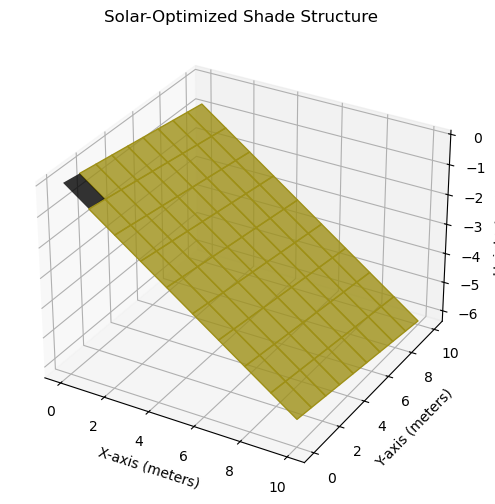

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import radians, sin, cos, tan
import pvlib  # For solar position calculations

# Function to calculate solar position
def calculate_solar_position(lat, lon, time):
    times = [time]  # Use a single timestamp for simplicity
    solar_position = pvlib.solarposition.get_solarposition(times, lat, lon)
    altitude = solar_position['apparent_elevation'].values[0]
    azimuth = solar_position['azimuth'].values[0]
    return altitude, azimuth

# Set parameters
latitude = 52.0  # Example: Amsterdam latitude
longitude = 4.9  # Example: Amsterdam longitude
timestamp = datetime(2024, 6, 21, 12, 0)  # Noon on summer solstice
altitude, azimuth = calculate_solar_position(latitude, longitude, timestamp)

# Create parametric canopy structure
grid_size = 10
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
X, Y = np.meshgrid(x, y)

# Optimize tilt based on solar altitude and azimuth
panel_tilt = 90 - altitude  # Perpendicular tilt to the sun's rays
panel_rotation = radians(azimuth)  # Convert azimuth to radians

# Calculate Z heights and tilted panels
Z = np.zeros_like(X)
panel_height = 1  # Height of each panel
tilt_x = panel_height * tan(radians(panel_tilt)) * np.cos(panel_rotation)
tilt_y = panel_height * tan(radians(panel_tilt)) * np.sin(panel_rotation)

# Adjust Z for tilted panels
Z = X * tilt_x + Y * tilt_y

# Visualize the solar-optimized canopy
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis(Z / np.max(Z)), alpha=0.8)

# Add labels
ax.set_title('Solar-Optimized Shade Structure')
ax.set_xlabel('X-axis (meters)')
ax.set_ylabel('Y-axis (meters)')
ax.set_zlabel('Height (meters)')

plt.show()

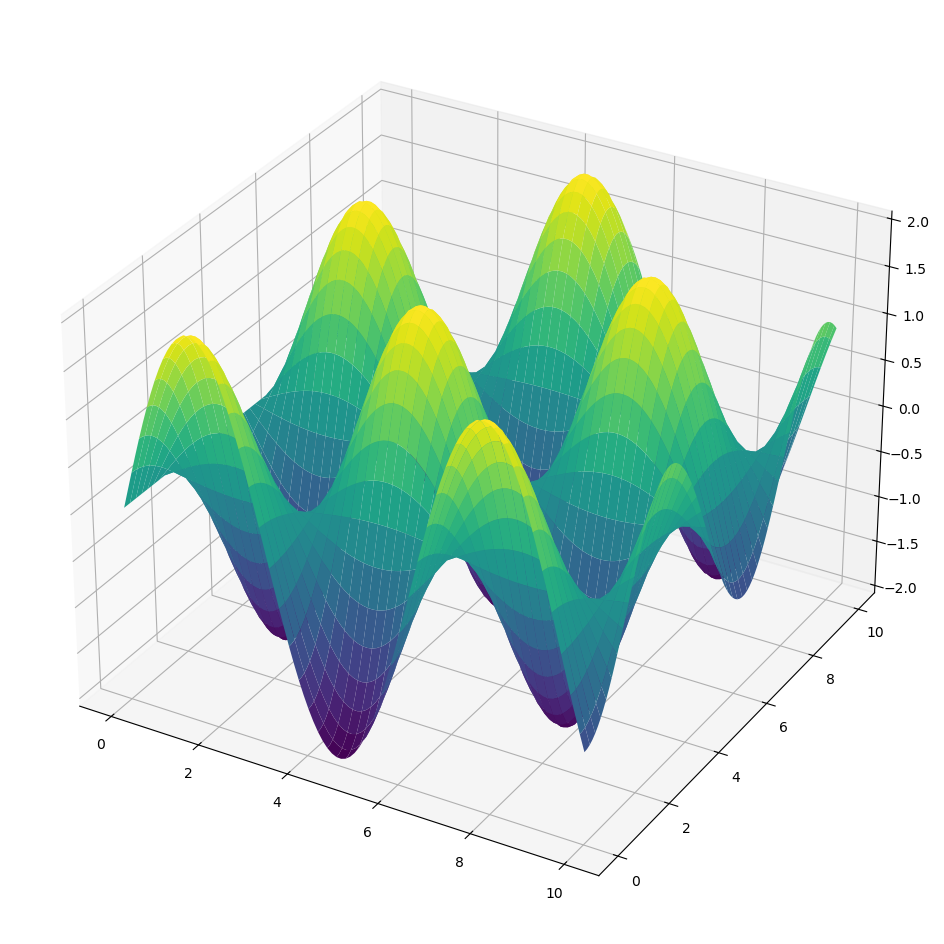

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid settings
grid_size = 100
x = np.linspace(0, 10, grid_size)
y = np.linspace(0, 10, grid_size)
X, Y = np.meshgrid(x, y)

# Apply a sine wave function to create the organic shape
Z = 2 * np.sin(X) * np.cos(Y)

# Visualize the surface
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

plt.show()

Solar Altitude: 61.24°, Azimuth: 188.45°


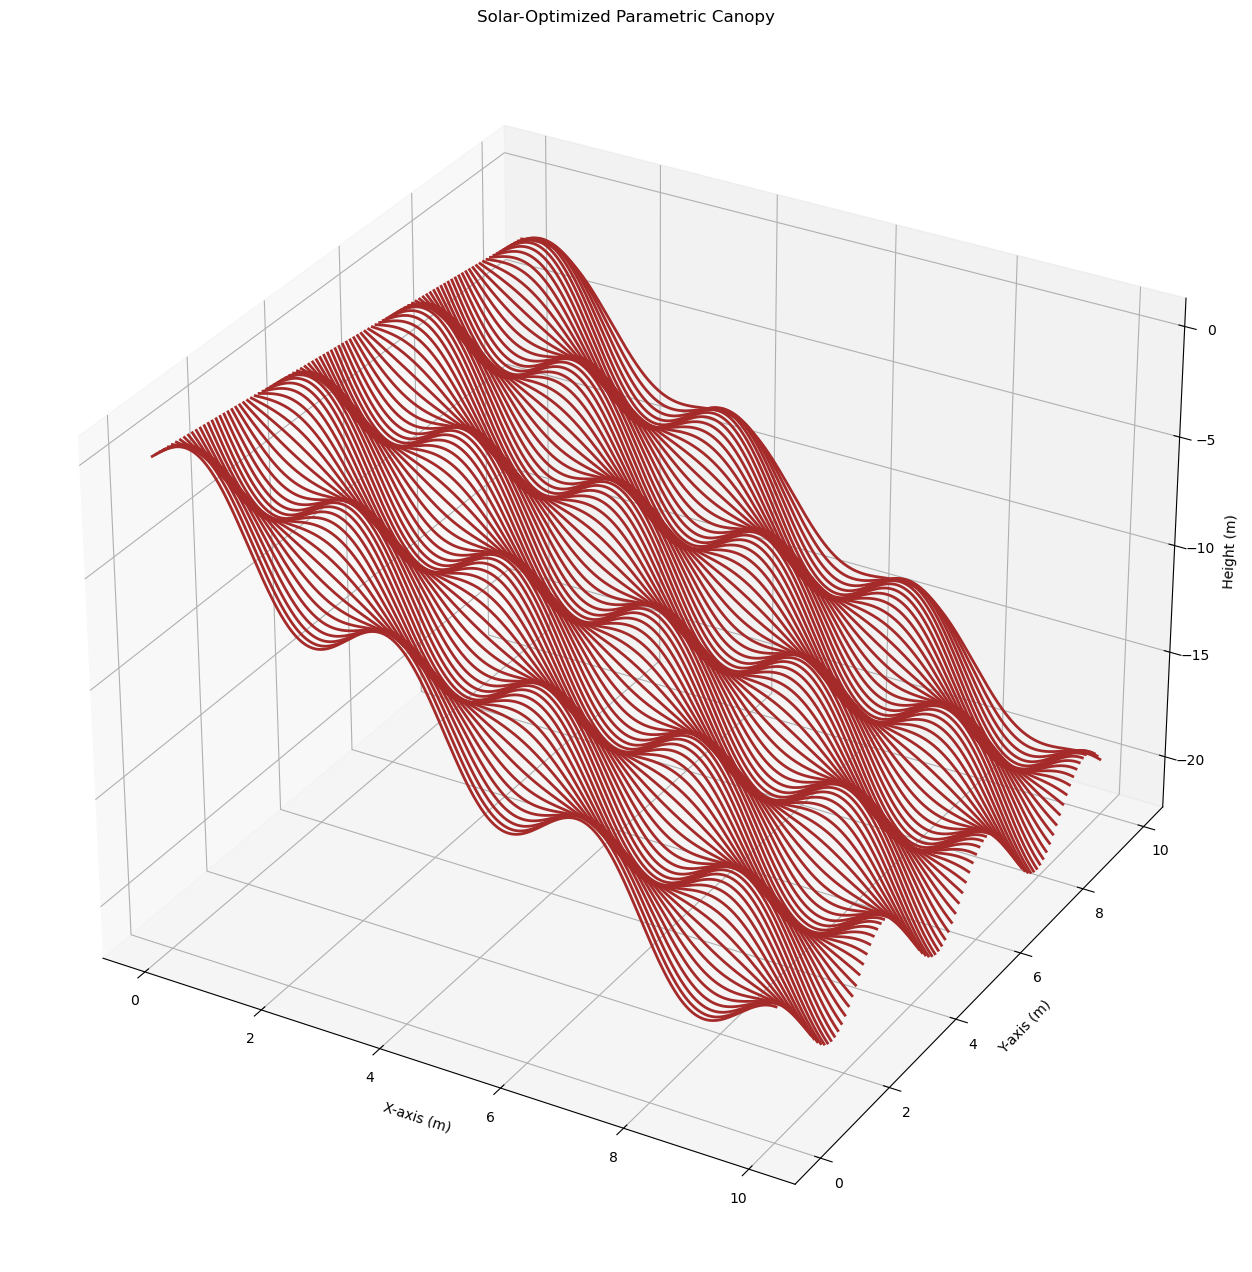

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import pvlib

# Function to calculate solar position
def get_solar_position(latitude, longitude, date_time):
    solpos = pvlib.solarposition.get_solarposition(date_time, latitude, longitude)
    altitude = np.radians(solpos['apparent_elevation'].values[0])  # Sun altitude in radians
    azimuth = np.radians(solpos['azimuth'].values[0])  # Sun azimuth in radians
    return altitude, azimuth

# Generate parametric grid
def generate_canopy(grid_size, wave_amplitude, wave_frequency):
    x = np.linspace(0, 10, grid_size)
    y = np.linspace(0, 10, grid_size)
    X, Y = np.meshgrid(x, y)

    # Organic wave pattern for the canopy surface
    Z = wave_amplitude * (np.sin(wave_frequency * X) * np.cos(wave_frequency * Y))
    return X, Y, Z

# Tilt canopy ribs based on solar position
def apply_solar_tilt(X, Y, Z, altitude, azimuth):
    # Tilt adjustment factor based on sun altitude and azimuth
    tilt_factor_x = np.tan(altitude) * np.cos(azimuth)
    tilt_factor_y = np.tan(altitude) * np.sin(azimuth)
    Z_tilted = Z + X * tilt_factor_x + Y * tilt_factor_y
    return Z_tilted

# Visualization function
def visualize_canopy(X, Y, Z, ribs=False):
    fig = plt.figure(figsize=(24, 16))
    ax = fig.add_subplot(111, projection='3d')

    # Draw surface or ribs
    if ribs:
        for i in range(0, len(X), 5):  # Extract every 5th row for ribs
            ax.plot(X[i, :], Y[i, :], Z[i, :], color='brown', lw=2)
    else:
        ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

    # Labels and adjustments
    ax.set_title("Solar-Optimized Parametric Canopy")
    ax.set_xlabel("X-axis (m)")
    ax.set_ylabel("Y-axis (m)")
    ax.set_zlabel("Height (m)")
    plt.show()

# --- MAIN PROGRAM ---

# Location and time for solar optimization (Example: Amsterdam, Summer Solstice Noon)
latitude, longitude = 52.0, 4.9
date_time = datetime(2024, 6, 21, 12, 0)  # Summer solstice, noon

# Get solar position
altitude, azimuth = get_solar_position(latitude, longitude, date_time)

# Generate base canopy
grid_size = 500
wave_amplitude = 2
wave_frequency = 2
X, Y, Z = generate_canopy(grid_size, wave_amplitude, wave_frequency)

# Apply solar tilt to optimize shading
Z_tilted = apply_solar_tilt(X, Y, Z, altitude, azimuth)

# Visualize results
print(f"Solar Altitude: {np.degrees(altitude):.2f}°, Azimuth: {np.degrees(azimuth):.2f}°")
visualize_canopy(X, Y, Z_tilted, ribs=True)

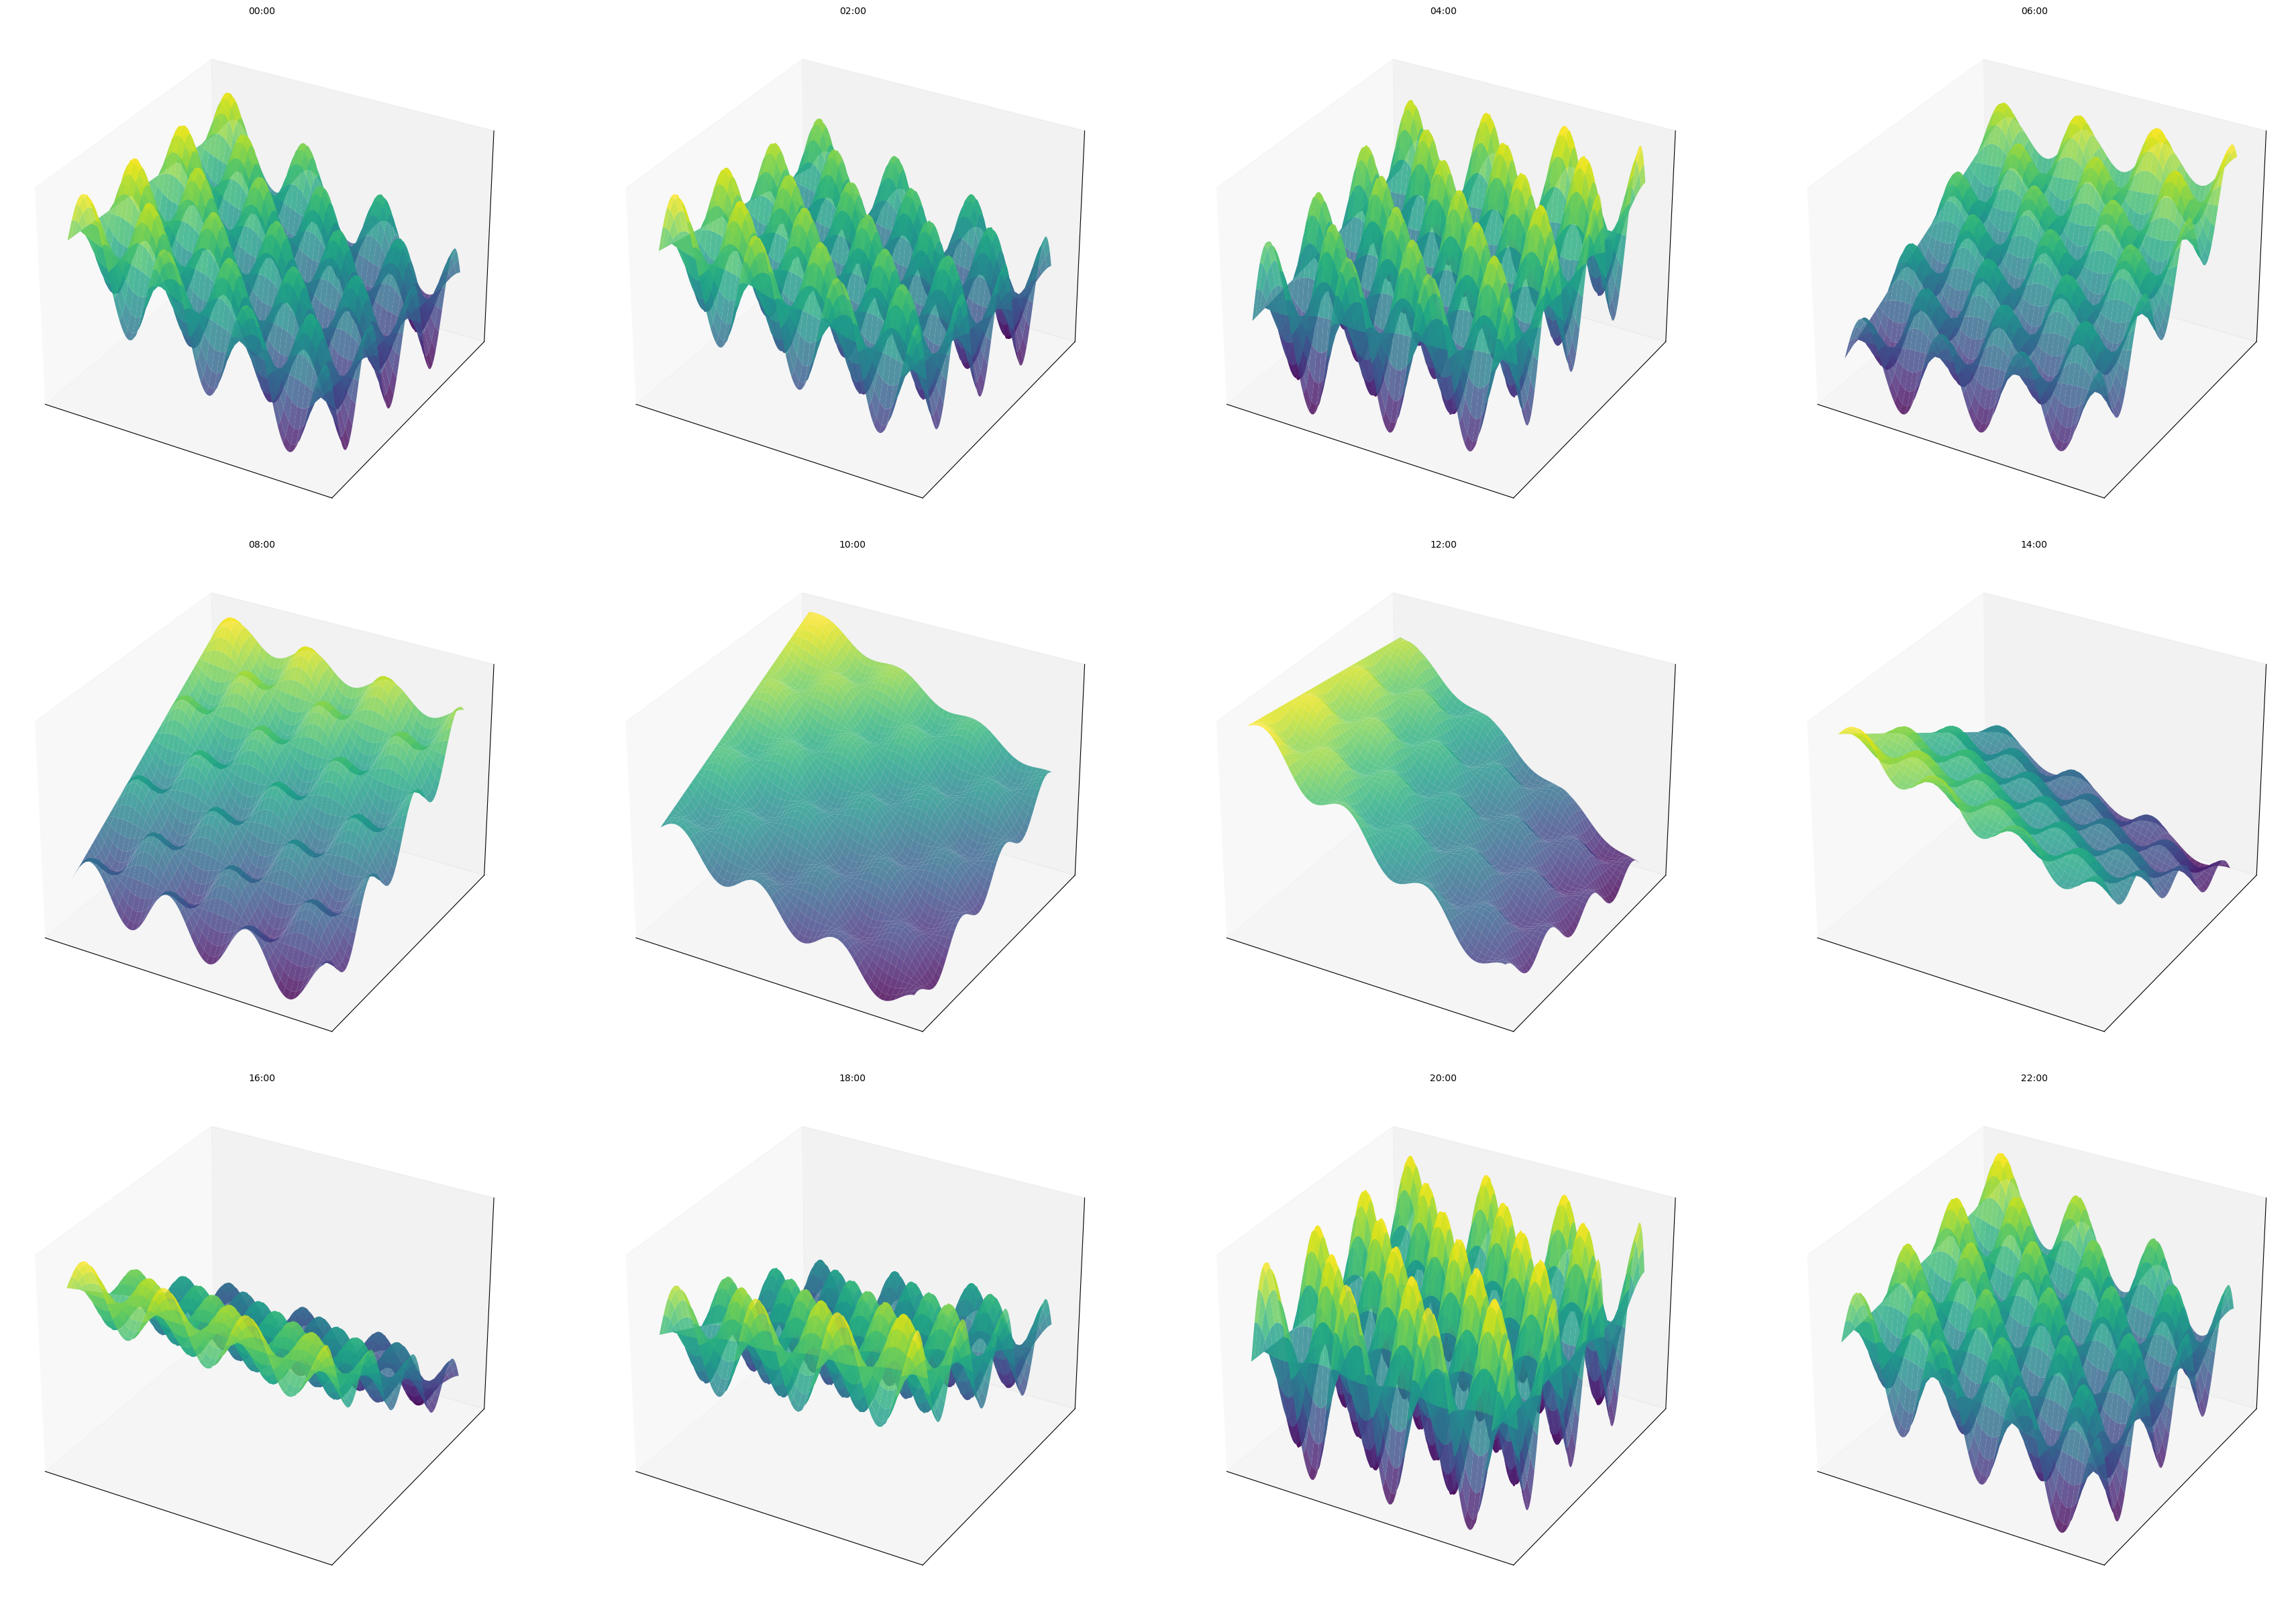

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pvlib

# Function to calculate solar positions for a day
def get_daily_solar_positions(latitude, longitude, date, time_step=1):
    times = [date + timedelta(hours=h) for h in range(0, 24, time_step)]
    solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
    altitude = np.radians(solpos['apparent_elevation'].values)  # Radians
    azimuth = np.radians(solpos['azimuth'].values)  # Radians
    return times, altitude, azimuth

# Generate parametric canopy surface
def generate_canopy(grid_size, wave_amplitude, wave_frequency):
    x = np.linspace(0, 10, grid_size)
    y = np.linspace(0, 10, grid_size)
    X, Y = np.meshgrid(x, y)
    Z = wave_amplitude * (np.sin(wave_frequency * X) * np.cos(wave_frequency * Y))
    return X, Y, Z

# Apply solar tilt based on altitude and azimuth
def apply_solar_tilt(X, Y, Z, altitude, azimuth):
    tilt_factor_x = np.tan(altitude) * np.cos(azimuth)
    tilt_factor_y = np.tan(altitude) * np.sin(azimuth)
    Z_tilted = Z + X * tilt_factor_x + Y * tilt_factor_y
    return Z_tilted

# Visualize multiple canopy states over the day
def visualize_daily_canopy(X, Y, Z, altitudes, azimuths, times, rows=4, cols=6):
    fig, axes = plt.subplots(rows, cols, figsize=(36, 24), subplot_kw={'projection': '3d'})
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i >= len(times): break
        Z_tilted = apply_solar_tilt(X, Y, Z, altitudes[i], azimuths[i])
        ax.plot_surface(X, Y, Z_tilted, cmap='viridis', edgecolor='none', alpha=0.8)
        ax.set_title(times[i].strftime('%H:%M'), fontsize=10)
        ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])

    plt.tight_layout()
    plt.show()

# --- MAIN PROGRAM ---

# Location: Amsterdam
latitude, longitude = 52.0, 4.9
date = datetime(2024, 6, 21)  # Summer solstice

# Solar positions over the day
time_step = 2  # Hours between calculations
times, altitudes, azimuths = get_daily_solar_positions(latitude, longitude, date, time_step)

# Generate base canopy
grid_size = 300
wave_amplitude = 1.5
wave_frequency = 2
X, Y, Z = generate_canopy(grid_size, wave_amplitude, wave_frequency)

# Visualize canopy at different times of the day
visualize_daily_canopy(X, Y, Z, altitudes, azimuths, times, rows=3, cols=4)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

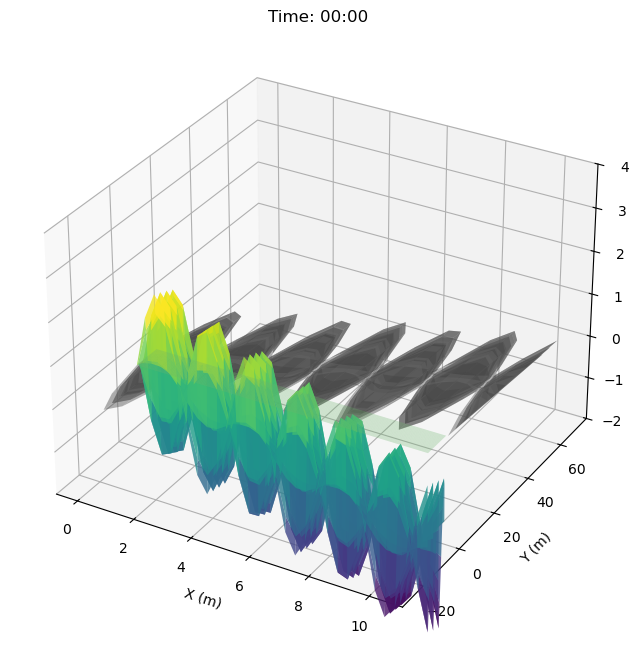

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
import pvlib
from matplotlib.animation import FuncAnimation

# Function to calculate solar positions for a day
def get_daily_solar_positions(latitude, longitude, date, time_step=1):
    times = [date + timedelta(hours=h) for h in range(0, 24, time_step)]
    solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
    altitude = np.radians(solpos['apparent_elevation'].values)  # Radians
    azimuth = np.radians(solpos['azimuth'].values)  # Radians
    return times, altitude, azimuth

# Generate parametric canopy surface
def generate_canopy(grid_size, wave_amplitude, wave_frequency):
    x = np.linspace(0, 10, grid_size)
    y = np.linspace(0, 10, grid_size)
    X, Y = np.meshgrid(x, y)
    Z = wave_amplitude * (np.sin(wave_frequency * X) * np.cos(wave_frequency * Y))
    return X, Y, Z

# Apply solar tilt to the canopy
def apply_solar_tilt(X, Y, Z, altitude, azimuth):
    tilt_factor_x = np.tan(altitude) * np.cos(azimuth)
    tilt_factor_y = np.tan(altitude) * np.sin(azimuth)
    Z_tilted = Z + X * tilt_factor_x + Y * tilt_factor_y
    return Z_tilted

# Calculate shadow on ground surface
def calculate_shadows(X, Y, Z, altitude, azimuth):
    shadow_X = X - Z * np.tan(azimuth)  # Projected X based on sun azimuth
    shadow_Y = Y - Z * np.tan(np.pi / 2 - azimuth)  # Projected Y
    shadow_Z = np.zeros_like(Z)  # Shadow lies flat on the ground
    return shadow_X, shadow_Y, shadow_Z

# Animation function
def animate(i):
    ax.clear()
    altitude, azimuth = altitudes[i], azimuths[i]
    Z_tilted = apply_solar_tilt(X, Y, Z, altitude, azimuth)
    shadow_X, shadow_Y, shadow_Z = calculate_shadows(X, Y, Z_tilted, altitude, azimuth)

    # Plot canopy
    ax.plot_surface(X, Y, Z_tilted, cmap='viridis', edgecolor='none', alpha=0.8)
    
    # Plot shadows
    ax.plot_surface(shadow_X, shadow_Y, shadow_Z, color='gray', alpha=0.5)

    # Plot ground
    ax.plot_surface(X, Y, np.zeros_like(Z), color='lightgreen', alpha=0.3)

    # Titles and adjustments
    ax.set_title(f"Time: {times[i].strftime('%H:%M')}", fontsize=12)
    ax.set_xlabel("X (m)"), ax.set_ylabel("Y (m)"), ax.set_zlabel("Height (m)")
    ax.set_zlim(-2, 4)

# --- MAIN PROGRAM ---

# Location: Amsterdam
latitude, longitude = 52.0, 4.9
date = datetime(2024, 6, 21)  # Summer solstice

# Solar positions over the day
time_step = 2  # Every 2 hours
times, altitudes, azimuths = get_daily_solar_positions(latitude, longitude, date, time_step)

# Generate base canopy
grid_size = 30
wave_amplitude = 2
wave_frequency = 2
X, Y, Z = generate_canopy(grid_size, wave_amplitude, wave_frequency)

# Initialize plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create animation
ani = FuncAnimation(fig, animate, frames=len(times), interval=1000, repeat=True)

#Save animation (optional)
ani.save("../results/output/canopy_shadows.mp4", writer="ffmpeg")

plt.show()

/opt/anaconda3/envs/shade_patterns/lib/python3.13/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


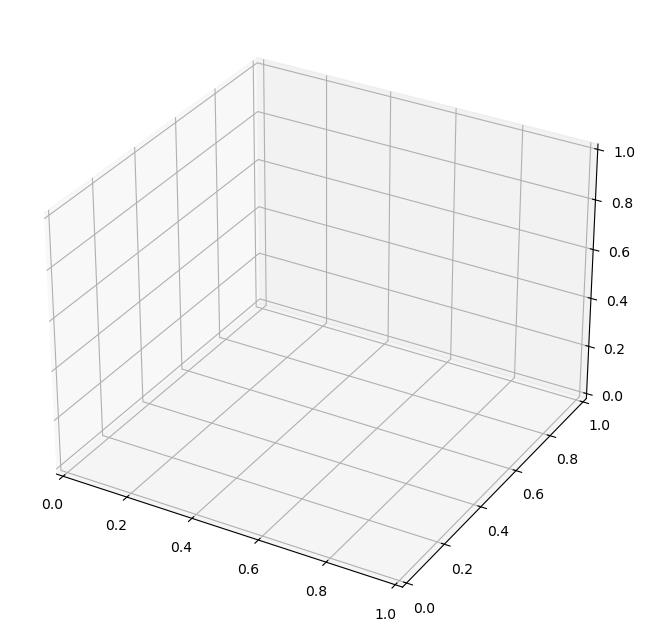

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta
import pvlib
from matplotlib.animation import FuncAnimation, PillowWriter

# Function to calculate solar positions for a day
def get_daily_solar_positions(latitude, longitude, date, time_step=1):
    times = [date + timedelta(hours=h) for h in range(0, 24, time_step)]
    solpos = pvlib.solarposition.get_solarposition(times, latitude, longitude)
    altitude = np.radians(solpos['apparent_elevation'].values)  # Radians
    azimuth = np.radians(solpos['azimuth'].values)  # Radians
    return times, altitude, azimuth

# Generate parametric canopy surface
def generate_canopy(grid_size, wave_amplitude, wave_frequency):
    x = np.linspace(0, 10, grid_size)
    y = np.linspace(0, 10, grid_size)
    X, Y = np.meshgrid(x, y)
    Z = wave_amplitude * (np.sin(wave_frequency * X) * np.cos(wave_frequency * Y))
    return X, Y, Z

# Apply solar tilt to the canopy
def apply_solar_tilt(X, Y, Z, altitude, azimuth):
    tilt_factor_x = np.tan(altitude) * np.cos(azimuth)
    tilt_factor_y = np.tan(altitude) * np.sin(azimuth)
    Z_tilted = Z + X * tilt_factor_x + Y * tilt_factor_y
    return Z_tilted

# Calculate shadow on ground surface
def calculate_shadows(X, Y, Z, altitude, azimuth):
    shadow_X = X - Z * np.tan(azimuth)  # Projected X based on sun azimuth
    shadow_Y = Y - Z * np.tan(np.pi / 2 - azimuth)  # Projected Y
    shadow_Z = np.zeros_like(Z)  # Shadow lies flat on the ground
    return shadow_X, shadow_Y, shadow_Z

# Animation function
def animate(i):
    ax.clear()
    altitude, azimuth = altitudes[i], azimuths[i]
    Z_tilted = apply_solar_tilt(X, Y, Z, altitude, azimuth)
    shadow_X, shadow_Y, shadow_Z = calculate_shadows(X, Y, Z_tilted, altitude, azimuth)

    # Plot canopy
    ax.plot_surface(X, Y, Z_tilted, cmap='viridis', edgecolor='none', alpha=0.8)
    
    # Plot shadows
    ax.plot_surface(shadow_X, shadow_Y, shadow_Z, color='gray', alpha=0.5)

    # Plot ground
    ax.plot_surface(X, Y, np.zeros_like(Z), color='lightgreen', alpha=0.3)

    # Titles and adjustments
    ax.set_title(f"Time: {times[i].strftime('%H:%M')}", fontsize=12)
    ax.set_xlabel("X (m)"), ax.set_ylabel("Y (m)"), ax.set_zlabel("Height (m)")
    ax.set_zlim(-2, 4)

# --- MAIN PROGRAM ---

# Location: Amsterdam
latitude, longitude = 52.0, 4.9
date = datetime(2024, 6, 21)  # Summer solstice

# Solar positions over the day
time_step = 2  # Every 2 hours
times, altitudes, azimuths = get_daily_solar_positions(latitude, longitude, date, time_step)

# Generate base canopy
grid_size = 30
wave_amplitude = 2
wave_frequency = 2
X, Y, Z = generate_canopy(grid_size, wave_amplitude, wave_frequency)

# Initialize plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create animation
ani = FuncAnimation(fig, animate, frames=len(times), interval=1000, repeat=True)

# To display in Jupyter Notebook (if required)
plt.show()

# Save animation as GIF (optional)
ani.save("../results/figures/canopy_shadow_animation.gif", writer=PillowWriter(fps=2))